In [16]:
import pandas as pd
from IPython.display import display 
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

data = pd.read_csv('../data/vehicle_price_prediction.csv',sep=',')

In [ ]:
display(data.head(5))

In [ ]:
print("Removendo as colunas:")
df = data.copy()
df.columns = df.columns.str.strip()
df = df.drop(["seller_type", "brand_popularity"], axis=1)
df.info()

In [ ]:
print("Quantidade de linhas e colunas")
print("linhas:", df.shape[0])
print("colunas:", df.shape[1])

In [ ]:
print('Valores faltantes')
df.isnull().sum()

In [ ]:
print("Entendendo valor nulo accident_history")
df['accident_history'].value_counts()

In [ ]:
print("Quantidade de dados faltantes para cada coluna")
df['accident_history'].fillna("Não teve acidente", inplace=True)
df.isnull().sum()

In [45]:
print("Describe dos dados numéricos:")
df.describe()

Describe dos dados numéricos:


,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,price
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00
mean,2017.45,112646.71,235.69,3.48,7.59,14539.98,20337.70
std,3.90,72095.15,93.66,1.54,3.83,6106.91,13650.44
min,2000.00,500.00,90.00,1.00,1.00,34.19,1500.00
25%,2015.00,57663.75,162.00,2.00,5.00,10490.75,10326.15
50%,2018.00,103338.00,215.00,4.00,7.00,14684.50,17874.32
75%,2020.00,157902.25,300.00,5.00,10.00,18690.22,27627.98
max,2025.00,300000.00,576.00,5.00,25.00,51046.00,91259.31


In [ ]:
print("Verificar dados duplicados")
df.loc[df.duplicated()]

In [ ]:
print("Valores unicos")
df.nunique()

year                   Axes(0.125,0.11;0.0945122x0.77)
mileage             Axes(0.238415,0.11;0.0945122x0.77)
engine_hp           Axes(0.351829,0.11;0.0945122x0.77)
owner_count         Axes(0.465244,0.11;0.0945122x0.77)
vehicle_age         Axes(0.578659,0.11;0.0945122x0.77)
mileage_per_year    Axes(0.692073,0.11;0.0945122x0.77)
price               Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

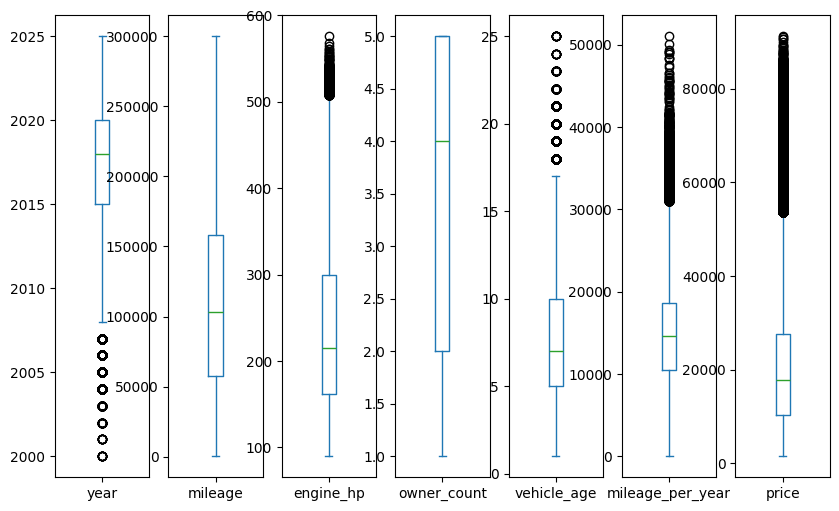

In [44]:
df.plot(kind='box', figsize=(10,6), subplots=True)

In [ ]:
display(df[df['price'] >= 90000])

In [ ]:
print("Dez maiores valores de carro incrementando nas informações a marca, modelo, ano e quantidade de milhas percorridas")
df.loc[:, ['make','model', 'year', 'mileage', 'price']].sort_values(by='price', ascending = False).head(10)

In [ ]:
print("Dez menos valores de carro incrementando nas informações a marca, modelo, ano e quantidade de milhas percorridas")
df.loc[:, ['make','model', 'year', 'mileage', 'price']].sort_values(by='price', ascending = True).head(10)

Quantidade de carros no ano de fabricação


Text(0, 0.5, 'Carros fabricados')

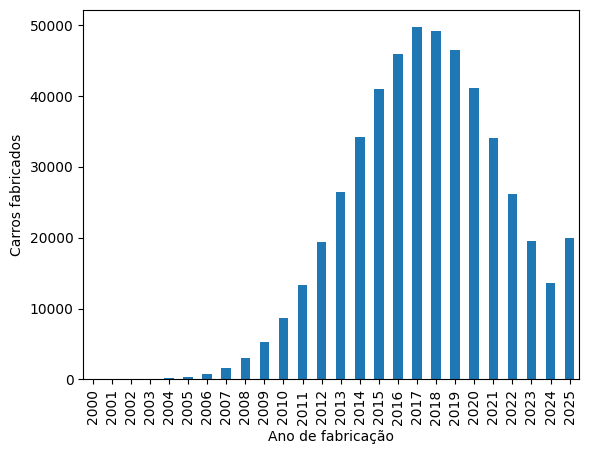

In [59]:
print("Quantidade de carros no ano de fabricação")
ax = df['year'].value_counts().sort_index().plot(kind='bar')

ax.set_xlabel('Ano de fabricação')
ax.set_ylabel('Carros fabricados')

In [ ]:
print("Quantidade de carros no ano de fabricação grafico em pizza")
plt.figure(figsize=(10,6))
df['year'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('')

In [ ]:
print("Correlação: Ano <-> Preço (medio)")

# Agrupa por ano e calcula a média dos preços
preco_medio_por_ano = df.groupby('year')['price'].mean().sort_index()

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(preco_medio_por_ano.index, preco_medio_por_ano.values, color='skyblue')

plt.title("Preço Médio por Ano do Veículo", fontsize=14)
plt.xlabel("Ano do Veículo")
plt.ylabel("Preço Médio (USD)")
plt.xticks(rotation=45)  # gira os anos para melhor visualização
plt.tight_layout()
plt.show()

In [ ]:
print("Correlação: Quilometragem <-> Preço")


In [ ]:
print("Correlação: Potência <-> Preço")


In [ ]:
print("Correlação: Ano <-> Quilometragem")


In [27]:
display(df.head(5), df.tail(5))

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,condition,trim,vehicle_age,mileage_per_year,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Excellent,EX,9,20433.67,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Good,LX,15,15776.20,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Excellent,Touring,9,11466.56,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Good,Base,9,13209.89,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Excellent,Sport,7,29167.14,8151.30


,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,condition,trim,vehicle_age,mileage_per_year,price
499995,Mercedes-Benz,E-Class,2013,108625,270,Automatic,Electric,FWD,Sedan,Gray,Beige,5,NaN,Excellent,EX,12,9052.08,18522.64
499996,Dodge,Challenger,2019,62206,182,Manual,Diesel,FWD,SUV,Red,Beige,4,NaN,Excellent,Base,6,10367.67,21894.28
499997,Tesla,Model S,2013,42789,371,Automatic,Electric,AWD,Sedan,White,Beige,4,NaN,Excellent,Sport,12,3565.75,28995.71
499998,Toyota,Highlander,2008,95841,153,Manual,Gasoline,AWD,Sedan,White,Gray,5,NaN,Good,Sport,17,5637.71,4622.22
499999,GMC,Acadia,2016,90288,259,Automatic,Gasoline,RWD,Pickup Truck,Red,Brown,3,NaN,Good,Base,9,10032.00,18993.83
